1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [45]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [46]:
import pandas as pd
import numpy as np

N = int(input('Insert starting row index:'))
#The code has been run for N=200000
file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name, nrows=N)
data.iloc[N:1310720, :]
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
199995,1,0,139,3869202157,76,0
199996,1,0,62,3869202157,76,2
199997,1,1,2,3869202157,94,15
199998,1,1,1,3869202157,96,13


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [47]:
l = 1

bx_vec = data.loc[:, 'BX_COUNTER']
orbit_vec = data.loc[:, 'ORBIT_CNT']

bx_max = np.zeros(len(data))
for i in range(N,len(data)-1):
    if orbit_vec.iloc[i] != orbit_vec.iloc[i+1]:
        bx_max[l] = bx_vec.iloc[i]
        l = l+1
    
bx_max = [bx_max[i] for i in range(len(bx_max)) if bx_max[i]!=0]
bx_in_orbit = np.max(bx_vec)
print(bx_in_orbit)
#print('The number of BX in a orbit is (for each orbit from labeled by N upwards)', bx_in_orbit)

3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

*Hint:* introduce an offset to the absolute time such that the start of the data acquisition (i.e. the first entry) is zero.

In [48]:
import datetime as dt

orbit = data.loc[:,'ORBIT_CNT']*3196*25
bx = data.loc[:,'BX_COUNTER']*25
tdc = data.loc[:,'TDC_MEAS']
first_row = data.loc[0,'ORBIT_CNT']*3196*25+data.loc[0,'BX_COUNTER']*25+data.loc[0,'TDC_MEAS']*(25/30)

#time_s = (orbit + bx + tdc) - first_row
time_s = orbit + bx + tdc

time_s = pd.Series(time_s, name='Time[ns]')
data['Time[ns]'] = time_s
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time[ns]
0,1,0,123,3869200167,2374,26,309149093402676
1,1,0,124,3869200167,2374,27,309149093402677
2,1,0,63,3869200167,2553,28,309149093407153
3,1,0,64,3869200167,2558,19,309149093407269
4,1,0,64,3869200167,2760,25,309149093412325
...,...,...,...,...,...,...,...
199995,1,0,139,3869202157,76,0,309149252346200
199996,1,0,62,3869202157,76,2,309149252346202
199997,1,1,2,3869202157,94,15,309149252346665
199998,1,1,1,3869202157,96,13,309149252346713


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [49]:
import datetime as dt

data['Elapsed time']=(pd.to_datetime(data.loc[:,'Time[ns]'])).dt.time
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time[ns],Elapsed time
0,1,0,123,3869200167,2374,26,309149093402676,13:52:29.093402
1,1,0,124,3869200167,2374,27,309149093402677,13:52:29.093402
2,1,0,63,3869200167,2553,28,309149093407153,13:52:29.093407
3,1,0,64,3869200167,2558,19,309149093407269,13:52:29.093407
4,1,0,64,3869200167,2760,25,309149093412325,13:52:29.093412
...,...,...,...,...,...,...,...,...
199995,1,0,139,3869202157,76,0,309149252346200,13:52:29.252346
199996,1,0,62,3869202157,76,2,309149252346202,13:52:29.252346
199997,1,1,2,3869202157,94,15,309149252346665,13:52:29.252346
199998,1,1,1,3869202157,96,13,309149252346713,13:52:29.252346


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [50]:
tdc = pd.Series(data['TDC_CHANNEL'].drop_duplicates())

print(tdc.nlargest(3))

7        139
64511    138
64513    137
Name: TDC_CHANNEL, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [51]:
notempty_orbits = len(data.groupby('ORBIT_CNT')['ORBIT_CNT'].count())
notempty_orbits   

1989

7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [52]:

orbits = data.loc[data['TDC_CHANNEL'] == 139, 'ORBIT_CNT'].unique()
n = len(orbits)
print(n)
    

1987


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [53]:
mask0 = data['FPGA']==0
data_FPGA0 = data[mask0]
FPGA0_s = pd.Series(data_FPGA0['TDC_MEAS'].values, index=data_FPGA0['TDC_CHANNEL'].values)
print(FPGA0_s)

mask1 = data['FPGA']==1
data_FPGA1 = data[mask1]
FPGA1_s = pd.Series(data_FPGA1['TDC_MEAS'].values, index=data_FPGA1['TDC_CHANNEL'].values)
print(FPGA1_s)

123    26
124    27
63     28
64     19
64     25
       ..
64     24
63      2
61      2
139     0
62      2
Length: 140714, dtype: int64
7       4
6      18
139     0
8      14
5       4
       ..
139     0
55      8
2      15
1      13
3      19
Length: 59286, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

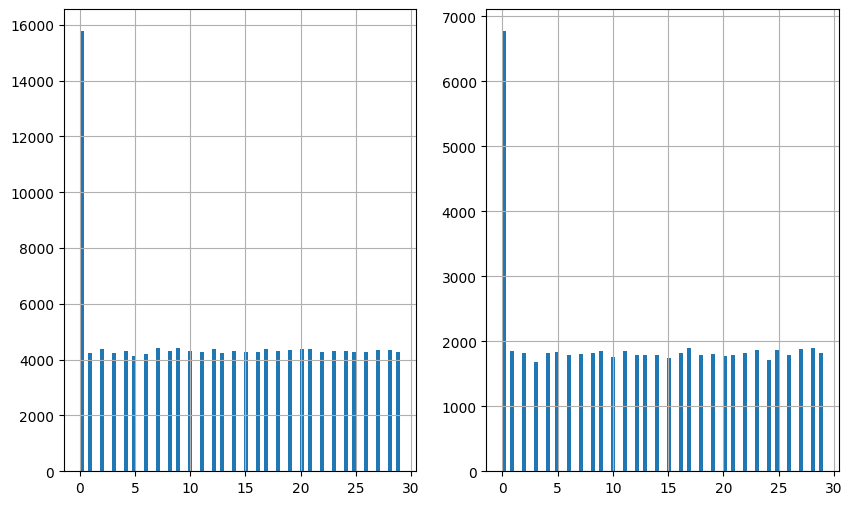

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axs[0].hist(FPGA0_s, bins=80)
axs[1].hist(FPGA1_s, bins=80)

axs[0].grid()
axs[1].grid()
